In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('winequality_clean.csv')

In [4]:
data.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,W0001,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,W0002,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5,2
2,W0003,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1,2
3,W0004,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,W0005,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [5]:
data.isnull().sum()

ID                        0
fixed acidity             0
volatile acidity          0
citric acid             733
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                      844
sulphates               723
alcohol                   0
quality                   0
dtype: int64

In [6]:
df = data
df.columns = [c.replace(' ', '_' )for c in data.columns]
display (df.head())
display(data.head())

,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,W0001,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,W0002,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5,2
2,W0003,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1,2
3,W0004,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,W0005,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,W0001,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,W0002,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5,2
2,W0003,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1,2
3,W0004,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,W0005,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [7]:
X = pd.DataFrame()
X = data.drop(['ID','quality'],axis = 1)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [8]:
y = data.quality
y.head()

0    2
1    2
2    2
3    2
4    2
Name: quality, dtype: int64

In [9]:
X.fillna(X.mean(),inplace=True)

In [12]:
y.unique()

array([2, 1], dtype=int64)

In [10]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X , y , random_state = 1)


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 25,
                              random_state = 1)

In [14]:
from sklearn.metrics import accuracy_score

model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test , y_predict))


0.8130612244897959


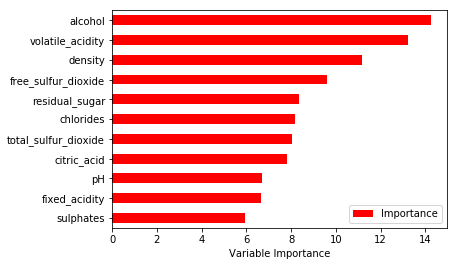

In [18]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100},index = X_train.columns)
Importance.sort_values('Importance' , axis = 0 ,ascending = True).plot(kind ='barh' , color = 'r')
plt.xlabel('Variable Importance')
plt.gca().Legend_ = None 